In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from scipy.signal import argrelextrema
import math
from scipy.signal import find_peaks
import matplotlib
matplotlib.rc('figure', figsize=(25, 25))

# Problem 1: Image Zooming

In [ ]:
path1 = r'/content/drive/MyDrive/DIP_A2/a21.jfif' #Image Path 1
path2 = r'/content/drive/MyDrive/DIP_A2/a22.jfif' #Image Path 2
path3 = r'/content/drive/MyDrive/DIP_A2/a23.jfif' #Image Path 3


### *NEAREST NEIGHBOUR INTERPOLATION*

In [ ]:
def nn_interpolate(img):
  h,w=img.shape[0],img.shape[1]
  scale=1.5
  h_new=int(h*scale)
  w_new=int(w*scale)
  zoomed_img=np.zeros((h_new,w_new,3),dtype=int)
  #print(zoomed_img)
  for i in range(h_new):
    for j in range(w_new):
      for k in range(3):
        zoomed_img[i][j][k]=img[math.floor(i/scale)][math.floor(j/scale)][k]
  return zoomed_img

### *BILINEAR INTERPOLATION*

In [ ]:
def bilinear(original_img, new_h, new_w):
	
	old_h, old_w, c = original_img.shape
	
	resized = np.zeros((new_h, new_w, c))
	
	w_scale_factor = (old_w ) / (new_w ) if new_h != 0 else 0
	h_scale_factor = (old_h ) / (new_h ) if new_w != 0 else 0
	for i in range(new_h):
		for j in range(new_w):
			
			x = i * h_scale_factor
			y = j * w_scale_factor
			
			x_floor = math.floor(x)
			x_ceil = min( old_h - 1, math.ceil(x))
			y_floor = math.floor(y)
			y_ceil = min(old_w - 1, math.ceil(y))

			if (x_ceil == x_floor) and (y_ceil == y_floor):
				q = original_img[int(x), int(y), :]
			elif (x_ceil == x_floor):
				q1 = original_img[int(x), int(y_floor), :]
				q2 = original_img[int(x), int(y_ceil), :]
				q = q1 * (y_ceil - y) + q2 * (y - y_floor)
			elif (y_ceil == y_floor):
				q1 = original_img[int(x_floor), int(y), :]
				q2 = original_img[int(x_ceil), int(y), :]
				q = (q1 * (x_ceil - x)) + (q2	 * (x - x_floor))
			else:
				v1 = original_img[x_floor, y_floor, :]
				v2 = original_img[x_ceil, y_floor, :]
				v3 = original_img[x_floor, y_ceil, :]
				v4 = original_img[x_ceil, y_ceil, :]

				q1 = v1 * (x_ceil - x) + v2 * (x - x_floor)
				q2 = v3 * (x_ceil - x) + v4 * (x - x_floor)
				q = q1 * (y_ceil - y) + q2 * (y - y_floor)

			resized[i,j,:] = q
	return resized.astype(np.uint8)

Text(0.5, 1.0, 'BILINEAR INTERPOLATION')

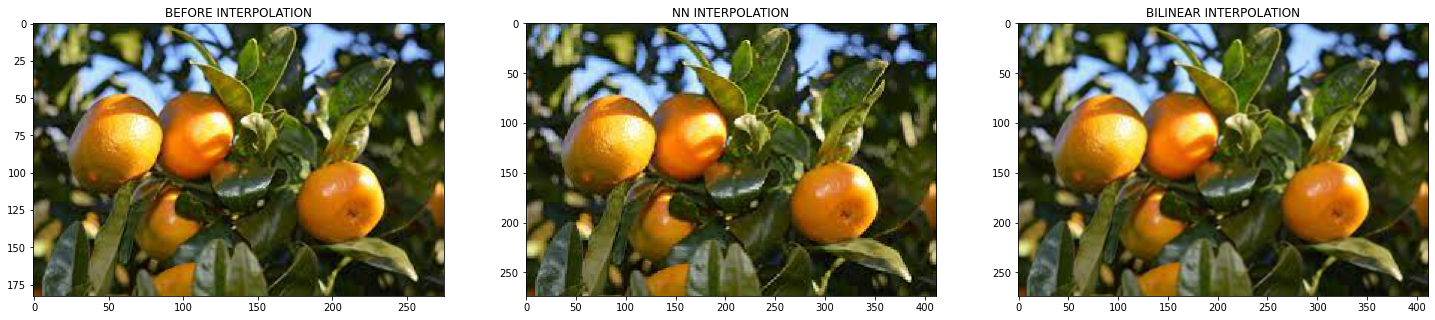

In [ ]:
A=plt.imread(path1)
# print(A.shape)
f, axarr = plt.subplots(1,3)
axarr[0].imshow(A)
axarr[0].set_title("BEFORE INTERPOLATION")
B=nn_interpolate(A)
axarr[1].imshow(B)
axarr[1].set_title("NN INTERPOLATION")
scale_factor=1.5
n_row,n_col = int(scale_factor * A.shape[0]),int(scale_factor * A.shape[1])
C=bilinear(A,n_row,n_col)
axarr[2].imshow(C)
axarr[2].set_title("BILINEAR INTERPOLATION")

# print(B.shape)


Text(0.5, 1.0, 'BILINEAR INTERPOLATION')

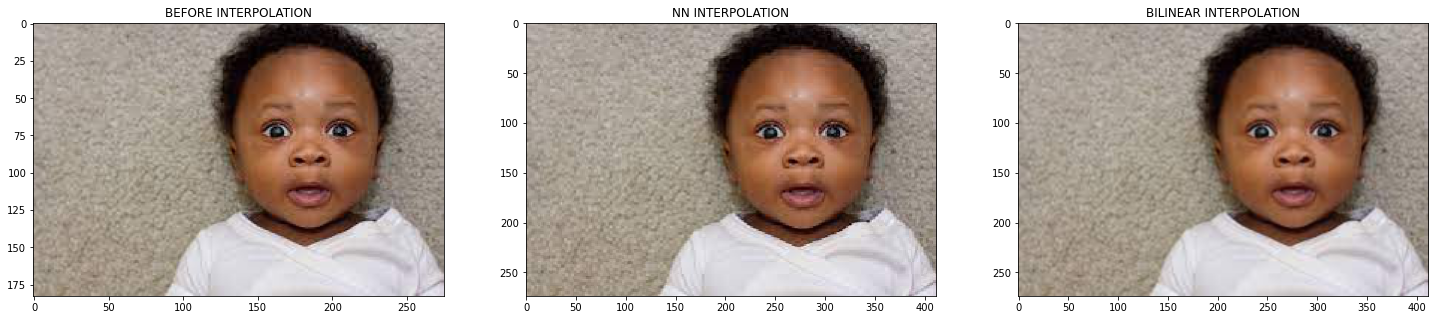

In [ ]:
A=plt.imread(path2)
# print(A.shape)
f, axarr = plt.subplots(1,3)
axarr[0].imshow(A)
axarr[0].set_title("BEFORE INTERPOLATION")
B=nn_interpolate(A)
axarr[1].imshow(B)
axarr[1].set_title("NN INTERPOLATION")
scale_factor=1.5
n_row,n_col = int(scale_factor * A.shape[0]),int(scale_factor * A.shape[1])
C=bilinear(A,n_row,n_col)
axarr[2].imshow(C)
axarr[2].set_title("BILINEAR INTERPOLATION")

# print(B.shape)


Text(0.5, 1.0, 'BILINEAR INTERPOLATION')

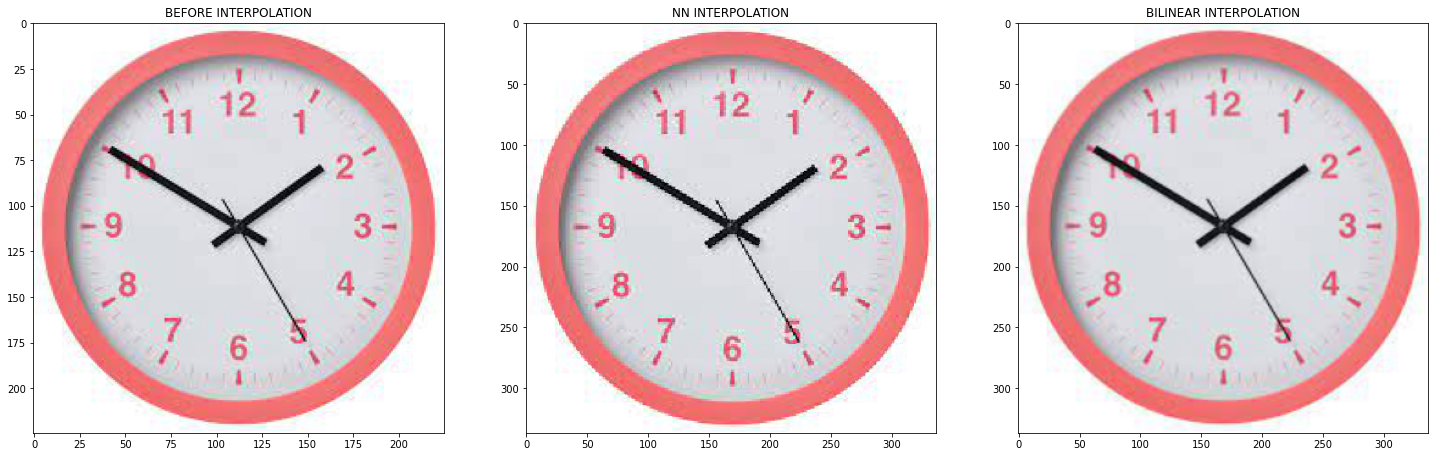

In [ ]:
A=plt.imread(path3)
# print(A.shape)
f, axarr = plt.subplots(1,3)
axarr[0].imshow(A)
axarr[0].set_title("BEFORE INTERPOLATION")
B=nn_interpolate(A)
axarr[1].imshow(B)
axarr[1].set_title("NN INTERPOLATION")
scale_factor=1.5
n_row,n_col = int(scale_factor * A.shape[0]),int(scale_factor * A.shape[1])
C=bilinear(A,n_row,n_col)
axarr[2].imshow(C)
axarr[2].set_title("BILINEAR INTERPOLATION")

# print(B.shape)


# The bilinear interpolation surely works much slower than the nearest neighbour.

# Problem 2: Histogram

### *1. Write a function to compute the histogram of an image and plot the same. What is the modality of the histogram for the images mentioned above?*

In [ ]:
matplotlib.rc('figure', figsize=(10, 5))
def histogram(img,color):# Function for plotting histogram
  a,b = np.histogram(img.ravel(),256)
  plt.hist(img.ravel(),256,[0,256],color=color)
  plt.show()

In [ ]:
def fpeaks(img):
# Compute the histogram and find the peaks
  hist, bin_edges = np.histogram(img, bins=256)
  peaks, _ = find_peaks(hist)
  num_peaks = len(peaks)
  return num_peaks

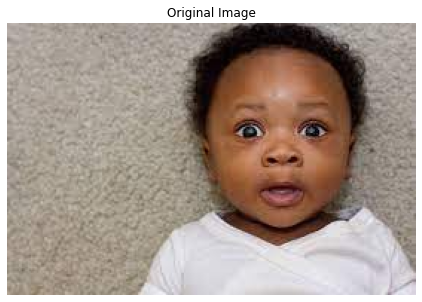

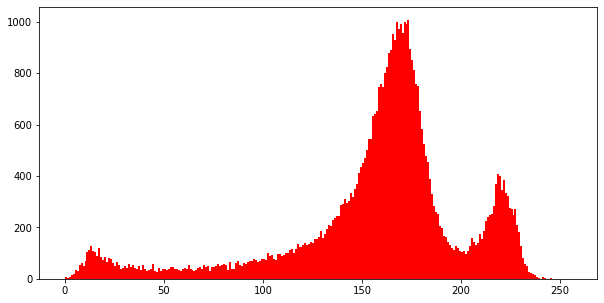

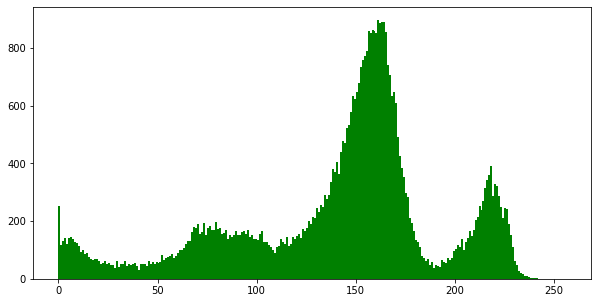

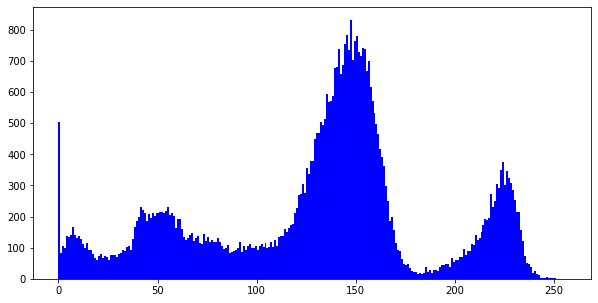

In [ ]:
imageObj = cv2.imread(path2)
plt.axis("off")
plt.title("Original Image")
plt.imshow(cv2.cvtColor(imageObj, cv2.COLOR_BGR2RGB))
plt.show()
  
# Get RGB data from image
blue_channel = imageObj[:,:,0]
green_channel = imageObj[:,:,1]
red_channel = imageObj[:,:,2]

histogram(red_channel,"red")
histogram(green_channel,"green")
histogram(blue_channel,"blue")


In [ ]:
rp=fpeaks(red_channel)
print("THE MODALITY OF RED CHANNEL HISTOGRAM IS ",rp)
gp=fpeaks(green_channel)
print("THE MODALITY OF GREEN CHANNEL HISTOGRAM IS ",gp)
bp=fpeaks(blue_channel)
print("THE MODALITY OF BLUE CHANNEL HISTOGRAM IS ",bp)

THE MODALITY OF RED CHANNEL HISTOGRAM IS  58
THE MODALITY OF GREEN CHANNEL HISTOGRAM IS  69
THE MODALITY OF BLUE CHANNEL HISTOGRAM IS  68


### *2.What can you say about the histogram of a resulting image if we keep the MSB bits in the bitplane to 0?*

In [ ]:
def bit_plane_img(img_arr,bit):
  if bit=='msb':
    b=0
  for i in range(img_arr.shape[0]):
    for j in range(img_arr.shape[1]):   
      bi = list(np.binary_repr(img_arr[i][j]))
      if bit == 'lsb':
        b=len(bi)-1
      bi[b]='0'
      bi = "".join(bi)  
      img_arr[i][j]=int(bi,2)
  return img_arr

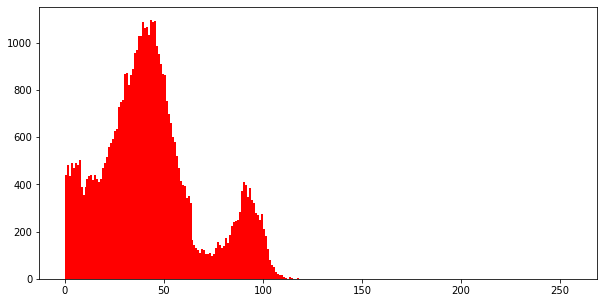

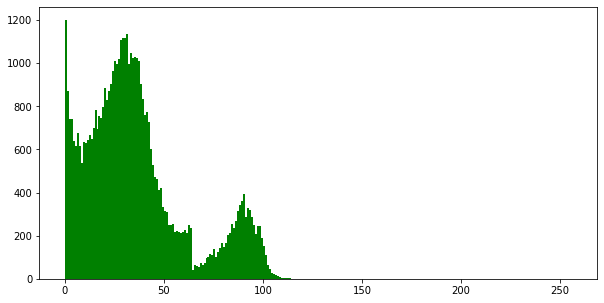

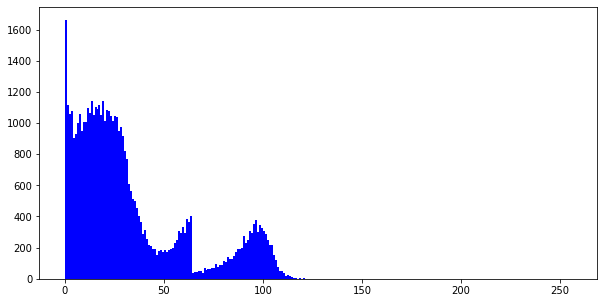

In [ ]:
# Get RGB data from image
imageObj = cv2.imread(path2)
blue_bit_m = bit_plane_img(imageObj[:,:,0],'msb')
green_bit_m = bit_plane_img(imageObj[:,:,1],'msb')
red_bit_m = bit_plane_img(imageObj[:,:,2],'msb')

histogram(red_bit_m,"red")
histogram(green_bit_m,"green")
histogram(blue_bit_m,"blue")

### *3. What can you say about the histogram of a resulting image if we keep the LSB bits in the bitplane to 0? Plot and Observe?*

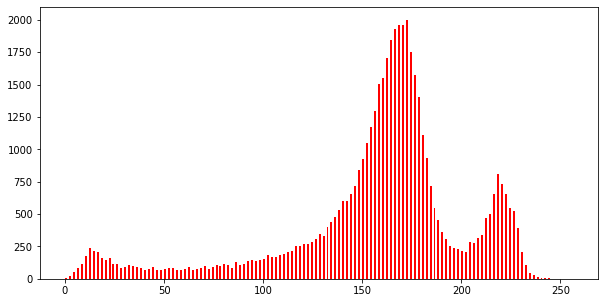

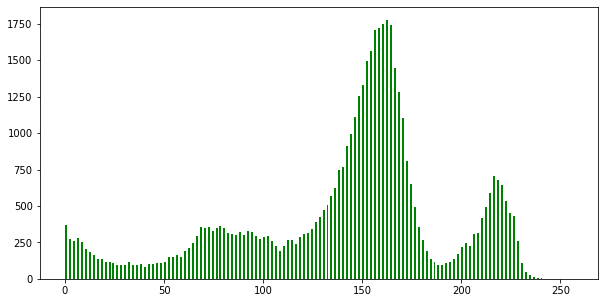

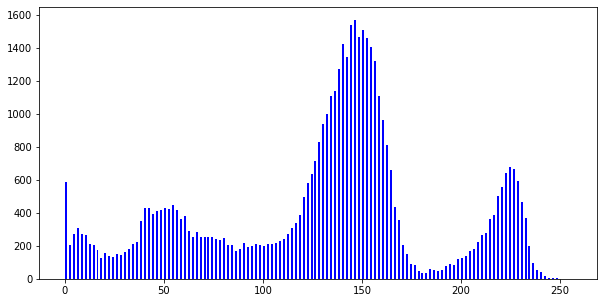

In [ ]:
# Get RGB data from image
imageObj = cv2.imread(path2)
blue_bit_l = bit_plane_img(imageObj[:,:,0],'lsb')
green_bit_l = bit_plane_img(imageObj[:,:,1],'lsb')
red_bit_l = bit_plane_img(imageObj[:,:,2],'lsb')

histogram(red_bit_l,"red")
histogram(green_bit_l,"green")
histogram(blue_bit_l,"blue")

### *4. Transmission is usually achieved through packets containing a start bit, a byte of information and a stop bit. Baud rate is a common measure for digital data transmission and is defined as number of bits transmitted per second. How much time would it take to transmit 512 x 512 grayscale image with intensity 0-255 over a 56K baud link? Similarly, calculate the time required to transmit the same image over a 3000K baud link.*

In [ ]:
def time_taken(dim,baud_r):
  n_bits_to_transmit=dim*dim*8
  time=n_bits_to_transmit/baud_r
  return time
t1=time_taken(512,56*1000)
print("Time taken to transmit over a 56K baud link: "+str(t1)+' sec')
t2=time_taken(512,3000*1000)
print("Time taken to transmit over a 3000K baud link: "+str(t2)+' sec')

Time taken to transmit over a 56K baud link: 37.44914285714286 sec
Time taken to transmit over a 3000K baud link: 0.6990506666666667 sec


# Problem 3: Point Operations

In [ ]:
img = cv2.imread(path2)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.imread(path2, 0)

In [ ]:
colored_negative = abs(255-img)
gray_negative = abs(255-gray)

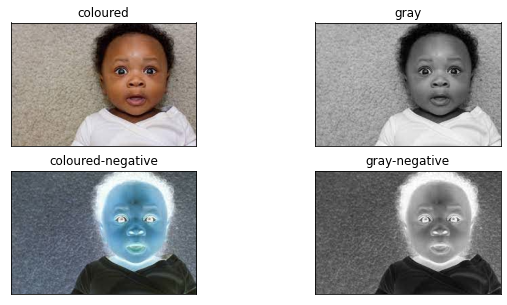

In [ ]:
imgs = [img, gray, colored_negative, gray_negative]
title = ['coloured', 'gray', 'coloured-negative', 'gray-negative']


plt.subplot(2, 2, 1)
plt.title(title[0])
plt.imshow(imgs[0])
plt.xticks([])
plt.yticks([])

plt.subplot(2, 2, 2)
plt.title(title[1])
plt.imshow(imgs[1], cmap='gray')
plt.xticks([])
plt.yticks([])

plt.subplot(2, 2, 3)
plt.title(title[2])
plt.imshow(imgs[2])
plt.xticks([])
plt.yticks([])

plt.subplot(2, 2, 4)
plt.title(title[3])
plt.imshow(imgs[3], cmap='gray')
plt.xticks([])
plt.yticks([])

plt.show()